# ASSIGNMENT_4

In [1]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')    #download stopwords
nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package

# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from textblob import TextBlob

import spacy
from spacy import displacy

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [2]:
import pandas as pd

# Load the file into a dataframe
data = pd.read_excel("Legal_Sentences_For_Training_With_BERT_With_Label.xlsx")

# Map the values from the "Label" column to their corresponding descriptive labels
label_map = {
    0: "Negative",
    1: "Neutral",
    2: "Positive"
}

data["New_Label"] = data["Label"].map(label_map)

# Display the first few rows of the updated dataframe
data.head()


,ID,Phrase,Sentiment,Label,New_Label
0,1,Getting nowhere with surplusage,-1,0,Negative
1,2,But the Court nowhere suggested that it would ...,-1,0,Negative
2,3,Petitioners objection to shaving his beard cla...,-1,0,Negative
3,4,That result clashes with everything else,-1,0,Negative
4,5,the tolerable duration of police inquiries in ...,0,1,Neutral


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         576 non-null    int64 
 1   Phrase     576 non-null    object
 2   Sentiment  576 non-null    int64 
 3   Label      576 non-null    int64 
 4   New_Label  576 non-null    object
dtypes: int64(3), object(2)
memory usage: 22.6+ KB


In [4]:
data.shape

(576, 5)

In [5]:
#Number in each category

data.New_Label.value_counts()

Negative    282
Positive    172
Neutral     122
Name: New_Label, dtype: int64

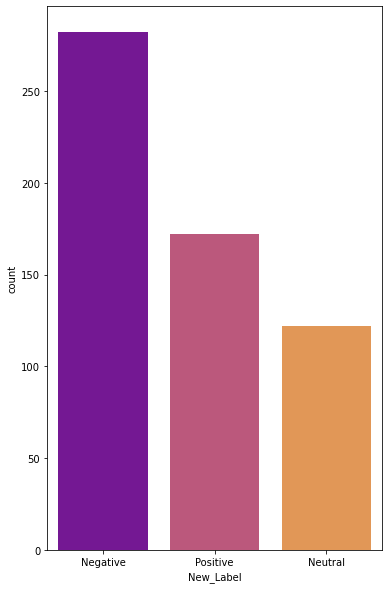

In [6]:
plt.figure(figsize=(6,10))
sns.countplot(data['New_Label'], order =data.New_Label.value_counts().index,palette= 'plasma')
plt.show()

# MISSING VALUES

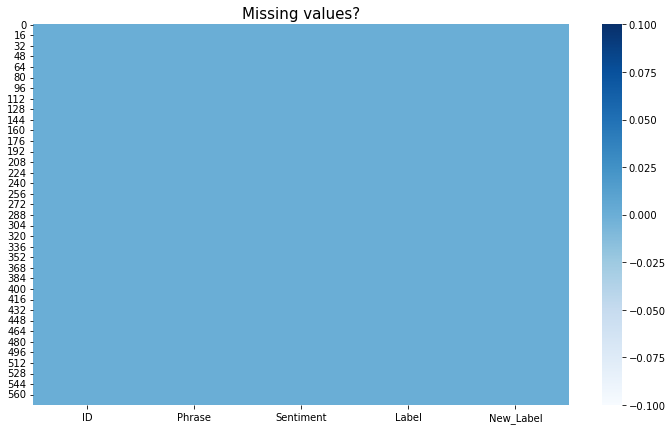

In [7]:
#Visualization of missing value using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), cmap = "Blues")                       
plt.title("Missing values?", fontsize = 15)
plt.show()

In [8]:
# check the missing values for all the columns
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

#plot the count of missing values in every column 
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.title('Bar plot for Null Values in each column')
    plt.xticks(rotation=90)
    plt.show()

In [9]:
# get the count of missing values in every column of the dataframe
return_missing_values(data)

Series([], dtype: int64)

# Unique Values

In [10]:
#get the unique values of every column
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [11]:
unidf = return_unique_values(data)
print(unidf)

    Features  Uniques
0         ID      576
1     Phrase      571
2  Sentiment        3
3      Label        3
4  New_Label        3


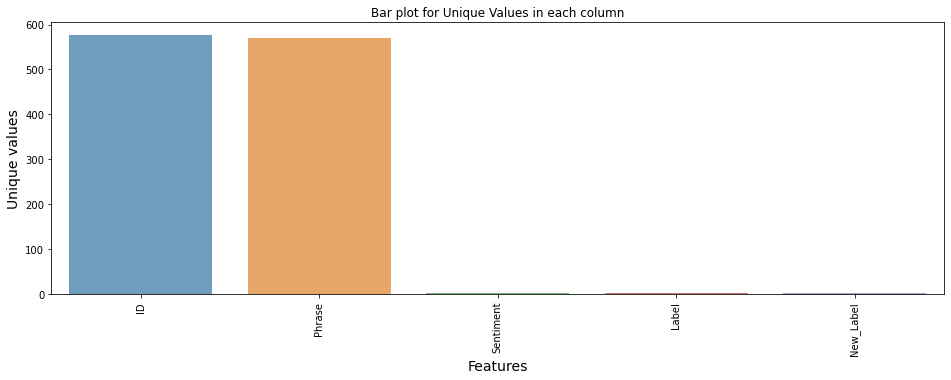

In [12]:
# plot the count of unique values in every column
f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

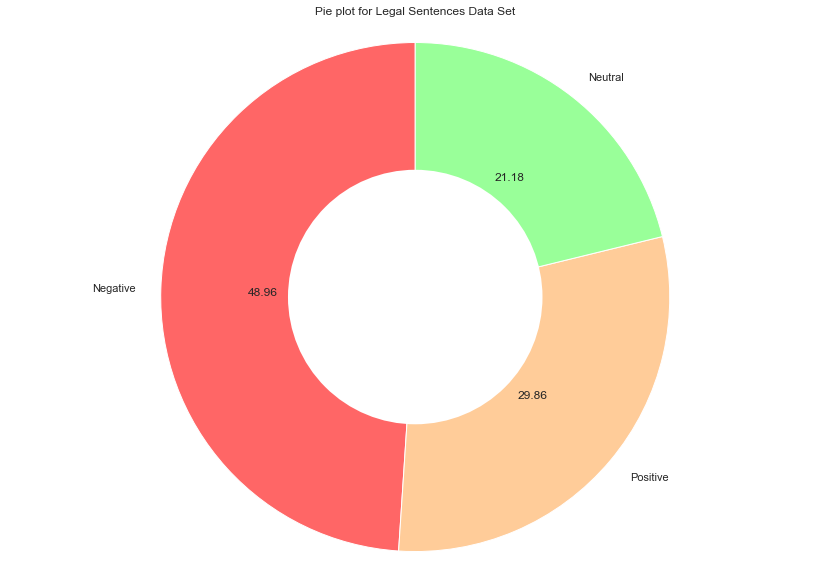

In [13]:
#plot for Dataset Categories
#Using matplotlib
colors = ['#ff6666', '#ffcc99', '#99ff99']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(data['New_Label'].value_counts(), labels=data['New_Label'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for Legal Sentences Data Set')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Distribution of words for each class before Text Preprocessing

In [14]:
#get the no of words in every text
data['word_count'] = [len(t.split()) for t in data.Phrase]
data.head()

,ID,Phrase,Sentiment,Label,New_Label,word_count
0,1,Getting nowhere with surplusage,-1,0,Negative,4
1,2,But the Court nowhere suggested that it would ...,-1,0,Negative,12
2,3,Petitioners objection to shaving his beard cla...,-1,0,Negative,15
3,4,That result clashes with everything else,-1,0,Negative,6
4,5,the tolerable duration of police inquiries in ...,0,1,Neutral,15


# Word Cloud for Negative Before Text Prepocessing

In [15]:
from wordcloud import WordCloud,STOPWORDS

In [16]:
negative=data[data['New_Label']=='Negative']
words = ' '.join(negative['Phrase'])
cleaned_word_1 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [17]:
wordcloud_1 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_1)

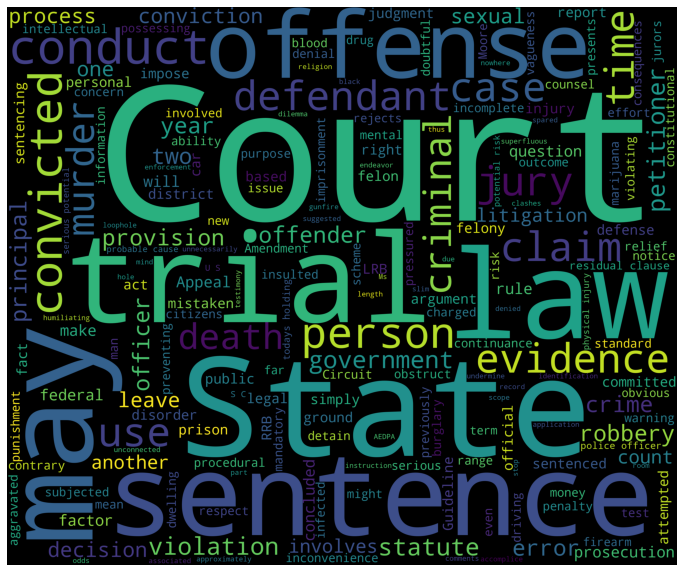

In [18]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_1)
plt.axis('off')
plt.show()

In [19]:
blob = TextBlob(cleaned_word_1)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

getting: 1
nowhere: 2
with: 29
surplusage: 1
but: 8
the: 280
court: 22
suggested: 2
that: 65
it: 29
would: 14
narrow: 1
bivens: 1
existing: 1
scope: 2
petitioners: 5
objection: 1
to: 147
shaving: 1
his: 31
beard: 1
clashes: 2
arkansas: 1
department: 1
of: 150
corrections: 1
grooming: 1
policy: 1
result: 1
everything: 1
else: 1
procedural: 3
hurdles: 1
could: 7
impose: 3
before: 3
returning: 1
money: 3
johnson: 1
heard: 1
more: 9
gunfire: 2
in: 62
living: 1
room: 2
and: 62
sound: 1
assailants: 1
leaving: 1
approximately: 2
one: 5
million: 1
americans: 1
have: 8
been: 7
wounded: 1
or: 32
killed: 1
by: 24
last: 1
decade: 1
slim: 2
record: 2
on: 19
activity: 1
at: 10
sullivan: 1
cromwell: 1
this: 17
instruction: 2
jury: 7
learned: 1
was: 36
notably: 1
inaccurate: 1
incomplete: 3
dated: 1
he: 17
accomplice: 2
drove: 1
family: 1
a: 120
remote: 1
pond: 1
where: 1
christeson: 1
cut: 1
ms: 2
brouks: 1
throat: 1
bone: 1
knife: 1
“: 6
became: 1
associated: 2
principals: 2
criminal: 6
endeavor: 2


In [20]:
items = blob.word_counts.items()

In [21]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [22]:
top40 = sorted_items[1:41]
negative_before = pd.DataFrame(top40, columns=['word', 'count'])

In [23]:
negative_before

,word,count
0,of,150
1,to,147
2,a,120
3,that,65
4,in,62
5,and,62
6,was,36
7,for,34
8,or,32
9,his,31


# Visualizing the DataFrame Before Text Prepocessing - Negative

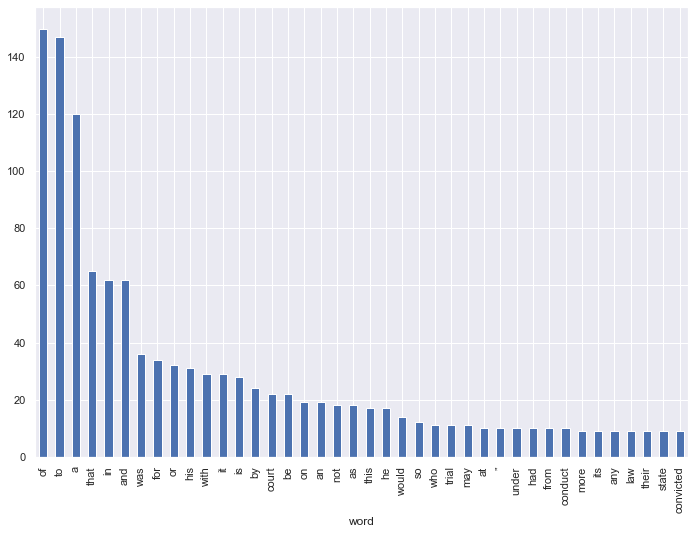

In [24]:
axes =  negative_before.plot.bar(x='word', y='count', legend=False)

# Word Cloud for Neutral Before Text Prepocessing

In [25]:
neutral=data[data['New_Label']=='Neutral']
words = ' '.join(neutral['Phrase'])
cleaned_word_2 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [26]:
wordcloud_2 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_2)

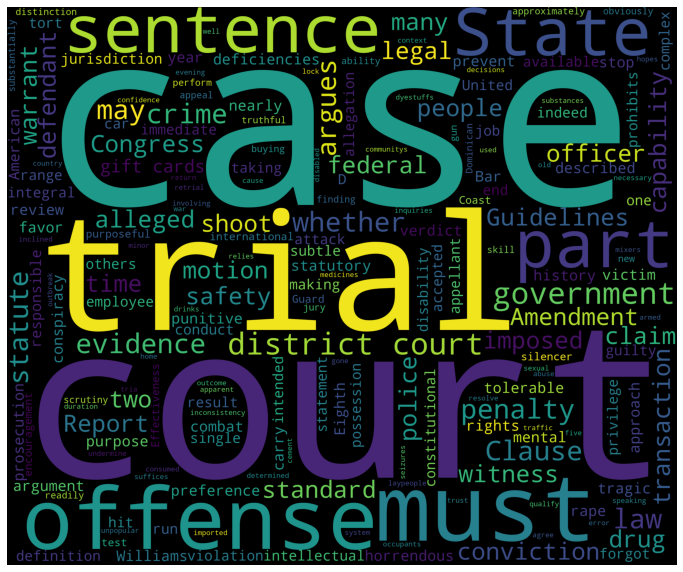

In [27]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_2)
plt.axis('off')
plt.show()

In [28]:
blob = TextBlob(cleaned_word_2)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

the: 139
tolerable: 2
duration: 1
of: 65
police: 3
inquiries: 1
in: 24
traffic-stop: 1
context: 1
is: 16
determined: 1
by: 10
seizures: 1
retrial: 1
be: 12
if: 4
trial: 7
error: 1
could: 4
resolve: 1
apparent: 1
inconsistency: 1
jurys: 1
verdicts: 1
i: 2
would: 5
inclined: 1
to: 54
agree: 1
return: 1
an: 20
unpopular: 1
verdict: 1
and: 23
communitys: 1
trust: 1
a: 45
system: 1
that: 31
relies: 1
on: 16
decisions: 1
laypeople: 1
it: 12
suffices: 1
undermine: 1
confidence: 1
outcome: 1
tria: 1
officer: 2
not: 19
armed: 1
with: 9
warrant: 3
may: 4
approach: 2
home: 1
hopes: 1
speaking: 1
its: 5
occupants: 1
cement: 1
mixers: 1
safety: 3
lock: 1
was: 10
disabled: 1
statutory: 2
rape: 2
offense: 5
involving: 1
16: 1
or: 15
17-year-old: 1
victim: 2
qualify: 1
as: 15
sexual: 1
abuse: 1
minor: 1
alleged: 3
case: 9
described: 2
how: 3
she: 5
had: 3
gone: 1
out: 1
two: 3
bars: 1
consumed: 1
five: 1
drinks: 1
during: 1
evening: 1
at: 4
outbreak: 1
war: 1
many: 3
necessary: 1
medicines: 1
other: 7

In [29]:
items = blob.word_counts.items()

In [30]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [31]:
top40 = sorted_items[1:41]
neutral_before = pd.DataFrame(top40, columns=['word', 'count'])

In [32]:
neutral_before

,word,count
0,of,65
1,to,54
2,a,45
3,that,31
4,in,24
5,and,23
6,an,20
7,not,19
8,for,17
9,is,16


# Visualizing the DataFrame Before Text Prepocessing - Neutral

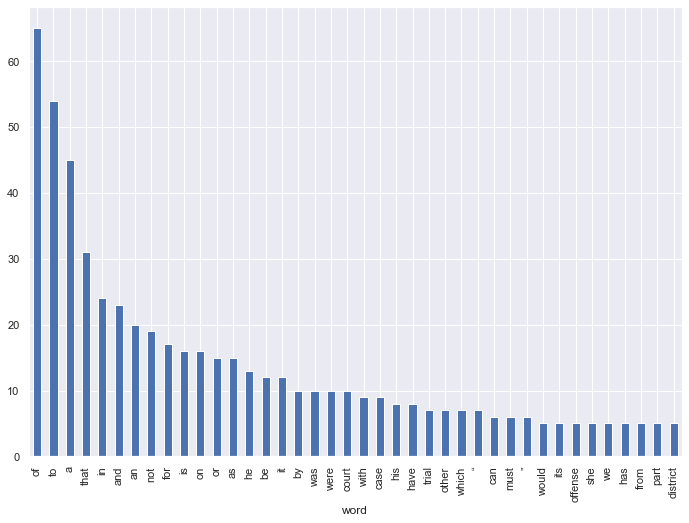

In [33]:
axes =  neutral_before.plot.bar(x='word', y='count', legend=False)

# Word Cloud for Positive Before Text Prepocessing

In [34]:
postive=data[data['New_Label']=='Positive']
words = ' '.join(postive['Phrase'])
cleaned_word_3 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [35]:
wordcloud_3 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_3)

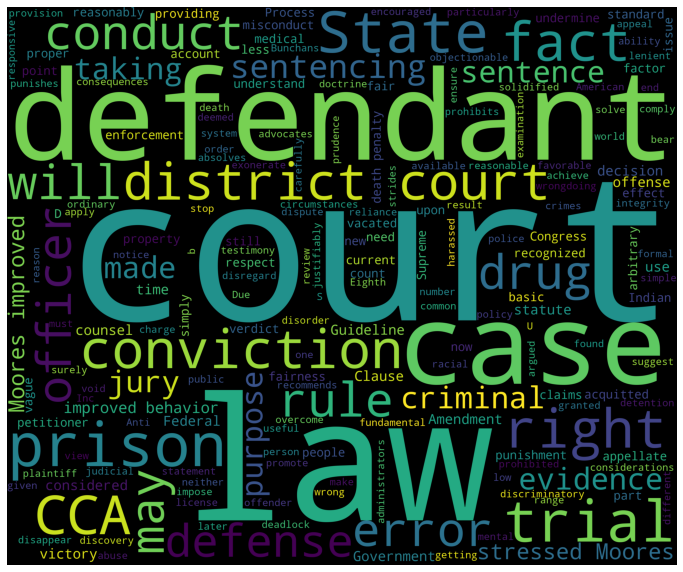

In [36]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_3)
plt.axis('off')
plt.show()

In [37]:
blob = TextBlob(cleaned_word_3)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

the: 186
trial: 8
court: 17
was: 14
inclined: 1
to: 82
accept: 1
prosecutions: 1
second: 1
reason: 2
for: 21
striking: 1
olanders: 1
d: 3
a: 59
plaintiff: 1
could: 4
overcome: 2
these: 4
hurdles: 1
where: 3
an: 12
officer: 5
acted: 1
in: 36
good: 1
faith: 1
avoid: 1
invasive: 1
frightening: 1
and: 39
humiliating: 1
encounters: 1
i: 1
am: 1
unwilling: 1
upset: 1
considered: 4
judgment: 1
of: 78
forensic: 1
psychologist: 1
he: 7
supreme: 3
confirmed: 1
that: 39
independent: 1
justification: 1
identity: 1
inquiries: 1
also: 7
is: 30
unnecessary: 1
when: 2
lawful: 1
detention: 2
underway: 1
unless: 1
such: 3
questioning: 1
prolongs: 1
never: 1
went: 1
around: 1
killing: 1
folks: 1
it: 11
not: 24
objectionable: 2
come: 1
upon: 3
part: 3
property: 3
which: 2
has: 8
been: 8
opened: 1
public: 2
common: 2
use: 4
district: 7
minimized: 1
aspects: 1
evidence: 5
moore: 3
qualified: 1
as: 10
intellectually: 2
disabled: 2
therefore: 2
ineligible: 1
death: 3
penalty: 1
kansas: 1
courts: 6
decision: 3

In [38]:
items = blob.word_counts.items()

In [39]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [40]:
top40 = sorted_items[1:41]
positive_before = pd.DataFrame(top40, columns=['word', 'count'])

In [41]:
positive_before

,word,count
0,to,82
1,of,78
2,a,59
3,and,39
4,that,39
5,in,36
6,is,30
7,not,24
8,for,21
9,be,20


# Visualizing the DataFrame Before Text Prepocessing - Positive

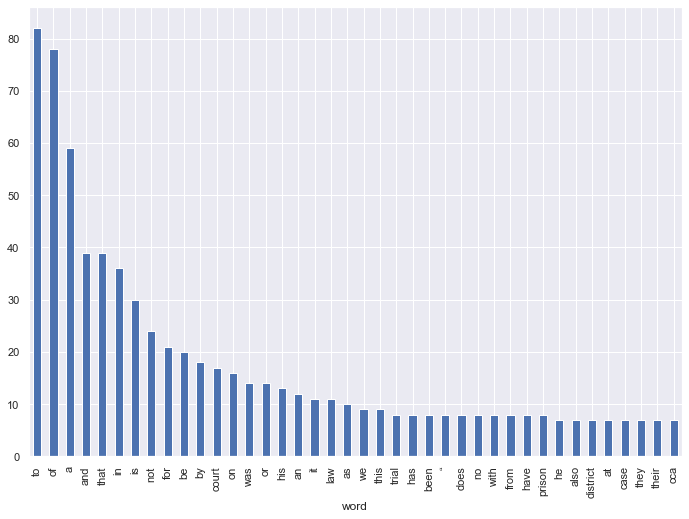

In [42]:
axes =  positive_before.plot.bar(x='word', y='count', legend=False)

# **Before Text Preprocessing drop irrlevant columns**

In [43]:
data = data.drop(['ID', 'Sentiment','Label','word_count'], axis =1)

In [44]:
data.head()

,Phrase,New_Label
0,Getting nowhere with surplusage,Negative
1,But the Court nowhere suggested that it would ...,Negative
2,Petitioners objection to shaving his beard cla...,Negative
3,That result clashes with everything else,Negative
4,the tolerable duration of police inquiries in ...,Neutral


**Text Preprocessing**

# SPACY for Lemmatization and Stopwords

In [45]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [46]:
def process_text(claim):
    """
    Lemmatizes the text and removes stopwords.
    """
    doc = nlp(claim)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [47]:
# Apply the function
data['Phrase'] = data['Phrase'].apply(process_text)

data.head()

,Phrase,New_Label
0,get surplusage,Negative
1,Court suggest narrow Bivens exist scope .,Negative
2,petitioner objection shave beard clash Arkansa...,Negative
3,result clash,Negative
4,tolerable duration police inquiry traffic - st...,Neutral


In [48]:
#Html tag removal
def perform_html_cleanup( raw_review ):
  # 1. Remove HTML
  review_text = BeautifulSoup(raw_review).get_text()
  return review_text

#Replace Contraction
def replace_contractions(raw_review):
    #Replace contractions in raw_review
    return contractions.fix(raw_review)

#Tokenization
def perform_tokenization( raw_review ):
   word_tokens = word_tokenize(raw_review)  # Tokenization
   return word_tokens

#Removal of Numbers
def remove_numbers(list_of_words): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

#Remove special characters
def remove_special_character_punctuation(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

#Remove punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words


#Conversion to Lower case
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words



#Remove empty String
def remove_empty_string(words):
  return list(filter(None, words))


#Stemming
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems


#Lemmatization
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas


In [49]:
def perform_cleanup(raw_review):
    clean_review = perform_html_cleanup(raw_review)
    clean_review = replace_contractions(clean_review)
    clean_review = perform_tokenization(clean_review)
    clean_review = remove_numbers(clean_review)
    clean_review = remove_special_character_punctuation(clean_review)
    clean_review = remove_punctuation(clean_review)
    clean_review  = to_lowercase(clean_review)
    clean_review = remove_empty_string(clean_review)
    #clean_review = stem_words(clean_review)
    clean_review = lemmatize_verbs(clean_review)
    return clean_review

In [50]:
data.head()

,Phrase,New_Label
0,get surplusage,Negative
1,Court suggest narrow Bivens exist scope .,Negative
2,petitioner objection shave beard clash Arkansa...,Negative
3,result clash,Negative
4,tolerable duration police inquiry traffic - st...,Neutral


In [51]:
clean_review = []

for i, row in data.iterrows():
    words = data.at[i, 'Phrase']
    words = perform_cleanup(words)
    data.at[i,'Phrase'] = " ".join( words )
    clean_review.append( data.at[i, 'Phrase'] )
data.head()

,Phrase,New_Label
0,get surplusage,Negative
1,court suggest narrow bivens exist scope,Negative
2,petitioner objection shave beard clash arkansa...,Negative
3,result clash,Negative
4,tolerable duration police inquiry traffic stop...,Neutral


# Word Cloud for Negative - After Text Processing

In [52]:
from wordcloud import WordCloud,STOPWORDS

In [53]:
negative_after=data[data['New_Label']=='Negative']
words = ' '.join(negative_after['Phrase'])
cleaned_word_4 = " ".join([word for word in words.split()])

In [54]:
wordcloud_4 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_4)

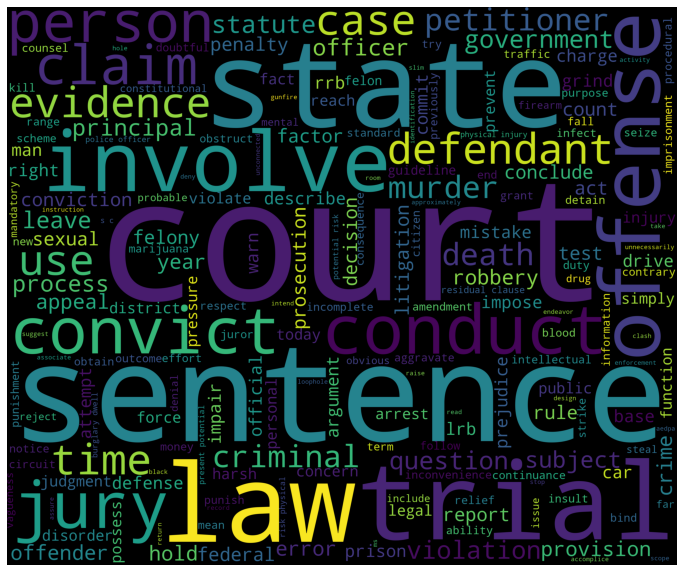

In [55]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_4)
plt.axis('off')
plt.show()

In [56]:
cleaned_word_4

'get surplusage court suggest narrow bivens exist scope petitioner objection shave beard clash arkansas department corrections groom policy result clash procedural hurdle impose return money johnson hear gunfire live room sound assailant leave approximately million americans wind kill gunfire decade slim record activity sullivan cromwell slim instruction jury learn notably inaccurate incomplete date accomplice drive family remote pond christeson cut ms brouks throat bone knife accomplice associate principal criminal endeavor take intend assure success leave loophole device design mean minimize court read aedpa create new loophole entirely unconnected stop raise claim unconnected prosecution decision outcome warn leave gape enforcement hole congresss regulatory scheme black hole confusion uncertainty frustrate effort impart murder ms harrison conscienceless pitiless unnecessarily torturous unnecessarily suggestive conducive irreparable mistake identification defendant deny process law s

In [57]:
from textblob import TextBlob

In [58]:
blob = TextBlob(cleaned_word_4)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

get: 1
surplusage: 1
court: 30
suggest: 2
narrow: 1
bivens: 1
exist: 1
scope: 2
petitioner: 7
objection: 1
shave: 1
beard: 1
clash: 2
arkansas: 1
department: 1
corrections: 1
groom: 1
policy: 1
result: 1
procedural: 3
hurdle: 1
impose: 4
return: 2
money: 3
johnson: 1
hear: 1
gunfire: 2
live: 1
room: 2
sound: 1
assailant: 1
leave: 6
approximately: 2
million: 1
americans: 1
wind: 1
kill: 3
decade: 1
slim: 2
record: 2
activity: 2
sullivan: 1
cromwell: 1
instruction: 2
jury: 9
learn: 1
notably: 1
inaccurate: 1
incomplete: 3
date: 1
accomplice: 2
drive: 4
family: 1
remote: 1
pond: 1
christeson: 1
cut: 1
ms: 2
brouks: 1
throat: 1
bone: 1
knife: 1
associate: 2
principal: 6
criminal: 7
endeavor: 2
take: 2
intend: 2
assure: 2
success: 1
loophole: 2
device: 1
design: 2
mean: 3
minimize: 1
read: 2
aedpa: 2
create: 1
new: 3
entirely: 1
unconnected: 2
stop: 2
raise: 2
claim: 8
prosecution: 5
decision: 5
outcome: 3
warn: 4
gape: 1
enforcement: 2
hole: 2
congresss: 1
regulatory: 1
scheme: 3
black: 2


In [59]:
items_4 = blob.word_counts.items()

In [60]:
from operator import itemgetter
sorted_items_4 = sorted(items_4, key=itemgetter(1), reverse=True)

In [61]:
top20 = sorted_items_4[1:21]

In [62]:
negative_after = pd.DataFrame(top20, columns=['word', 'count'])

In [63]:
negative_after

,word,count
0,sentence,18
1,state,14
2,law,11
3,trial,11
4,involve,10
5,offense,10
6,conduct,10
7,jury,9
8,officer,9
9,convict,9


# Visualizing the DataFrame Before Text Prepocessing - Negative

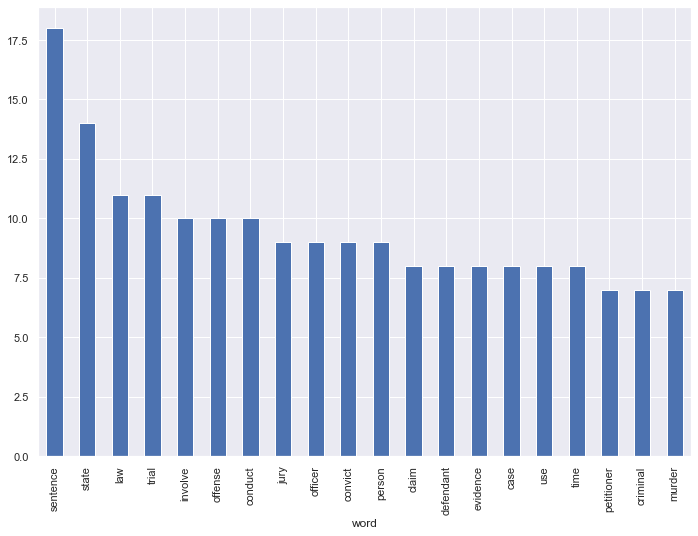

In [64]:
axes =  negative_after.plot.bar(x='word', y='count', legend=False)

# Word Cloud for Neutral - After Text Processing

In [65]:
from wordcloud import WordCloud,STOPWORDS

In [66]:
negative_after=data[data['New_Label']=='Neutral']
words = ' '.join(negative_after['Phrase'])
cleaned_word_5 = " ".join([word for word in words.split()])

In [67]:
wordcloud_5 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_5)

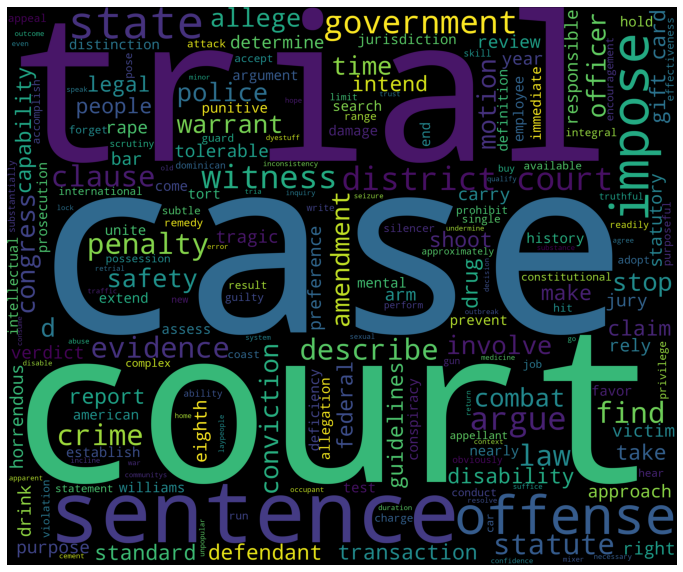

In [68]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_5)
plt.axis('off')
plt.show()

In [69]:
from textblob import TextBlob

In [70]:
blob = TextBlob(cleaned_word_5)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

tolerable: 2
duration: 1
police: 3
inquiry: 1
traffic: 1
stop: 3
context: 1
determine: 2
seizure: 1
retrial: 1
trial: 8
error: 1
resolve: 1
apparent: 1
inconsistency: 1
jury: 2
verdict: 2
incline: 1
agree: 1
return: 1
unpopular: 1
communitys: 1
trust: 1
system: 1
rely: 2
decision: 1
laypeople: 1
suffice: 1
undermine: 1
confidence: 1
outcome: 1
tria: 1
officer: 3
arm: 2
warrant: 3
approach: 2
home: 1
hope: 1
speak: 1
occupant: 1
cement: 1
mixer: 1
safety: 3
lock: 1
disable: 1
statutory: 2
rape: 2
offense: 5
involve: 3
year: 2
old: 1
victim: 2
qualify: 1
sexual: 1
abuse: 1
minor: 1
allege: 3
case: 12
describe: 4
go: 1
bar: 2
consume: 1
drink: 2
even: 1
outbreak: 1
war: 1
necessary: 1
medicine: 1
substance: 1
dyestuff: 1
country: 1
import: 1
purpose: 2
because: 2
harm: 1
need: 1
eighth: 2
amendment: 3
liability: 1
lsb: 1
prison: 1
rsb: 1
riot: 1
abide: 1
limitation: 1
congress: 3
impose: 5
right: 2
say: 1
client: 1
truly: 1
remorseful: 1
help: 1
respond: 1
tragic: 2
effect: 1
hurricane: 1

In [71]:
items = blob.word_counts.items()

In [72]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [73]:
top20 = sorted_items[1:21]
neutral_after = pd.DataFrame(top20, columns=['word', 'count'])
neutral_after

,word,count
0,case,12
1,trial,8
2,sentence,7
3,offense,5
4,impose,5
5,state,5
6,government,5
7,argue,5
8,witness,5
9,district,5


# Visualizing the DataFrame After Text Prepocessing - Neutral

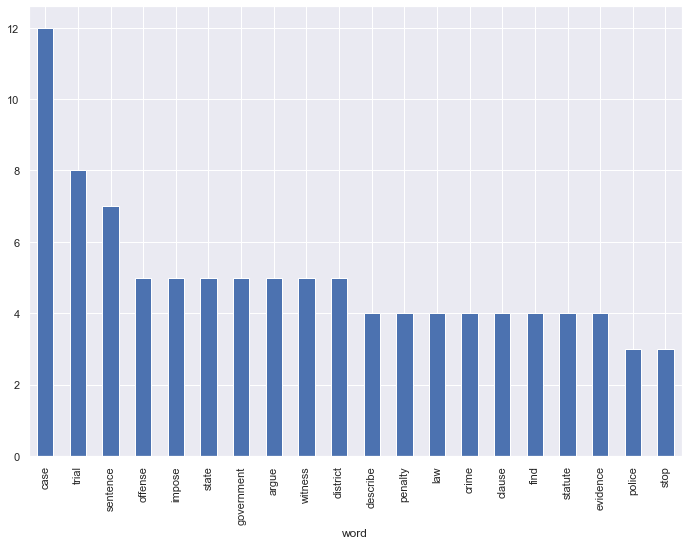

In [74]:
axes =  neutral_after.plot.bar(x='word', y='count', legend=False)

# Word Cloud for Positive - After Text Processing

In [75]:
positive_after=data[data['New_Label']=='Positive']
words = ' '.join(positive_after['Phrase'])
cleaned_word_6 = " ".join([word for word in words.split()])

In [76]:
wordcloud_6 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_6)

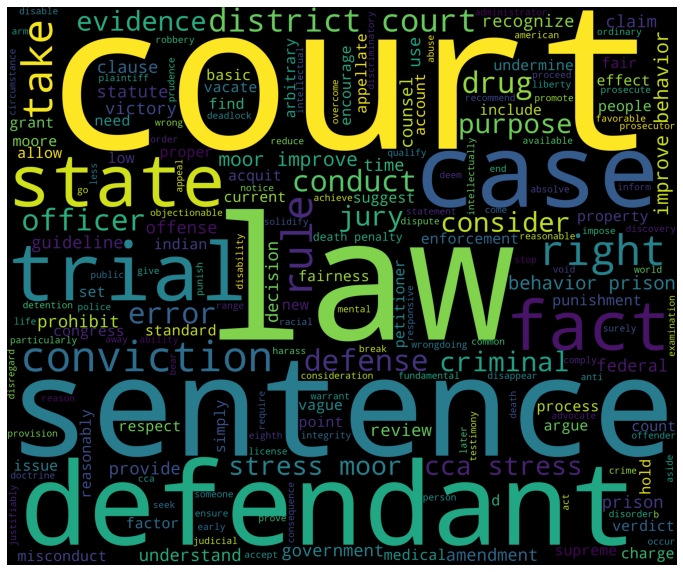

In [77]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_6)
plt.axis('off')
plt.show()

In [78]:
blob = TextBlob(cleaned_word_6)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

trial: 8
court: 23
incline: 1
accept: 2
prosecution: 1
second: 1
reason: 2
strike: 1
olanders: 1
d: 3
plaintiff: 2
overcome: 2
hurdle: 1
officer: 6
act: 2
good: 1
faith: 1
avoid: 1
invasive: 1
frighten: 1
humiliate: 1
encounter: 1
unwilling: 1
upset: 1
consider: 5
judgment: 1
forensic: 1
psychologist: 1
supreme: 3
confirm: 1
independent: 1
justification: 1
identity: 1
inquiry: 1
unnecessary: 1
lawful: 1
detention: 2
underway: 1
question: 1
prolong: 1
go: 2
kill: 1
folk: 1
objectionable: 2
come: 2
property: 3
open: 1
public: 2
common: 2
use: 4
district: 7
minimize: 1
aspect: 1
evidence: 5
moore: 3
qualify: 2
intellectually: 2
disable: 2
ineligible: 1
death: 5
penalty: 3
kansas: 1
decision: 3
particularly: 2
unlikely: 1
undermine: 3
state: 8
federal: 4
constitution: 1
ii: 1
congress: 3
enact: 1
force: 1
accompaniment: 1
provision: 2
outbreak: 1
bank: 1
robbery: 2
commit: 1
john: 1
dillinger: 1
hold: 3
indictment: 1
defective: 1
simply: 3
period: 1
include: 3
premajority: 1
conduct: 6
ter

In [79]:
items = blob.word_counts.items()

In [80]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [81]:
top20 = sorted_items[1:21]
positive_after = pd.DataFrame(top20, columns=['word', 'count'])
positive_after

,word,count
0,law,11
1,sentence,11
2,defendant,10
3,case,9
4,trial,8
5,state,8
6,prison,8
7,district,7
8,fact,7
9,conviction,7


# Visualizing the DataFrame Before Text Prepocessing - Positive

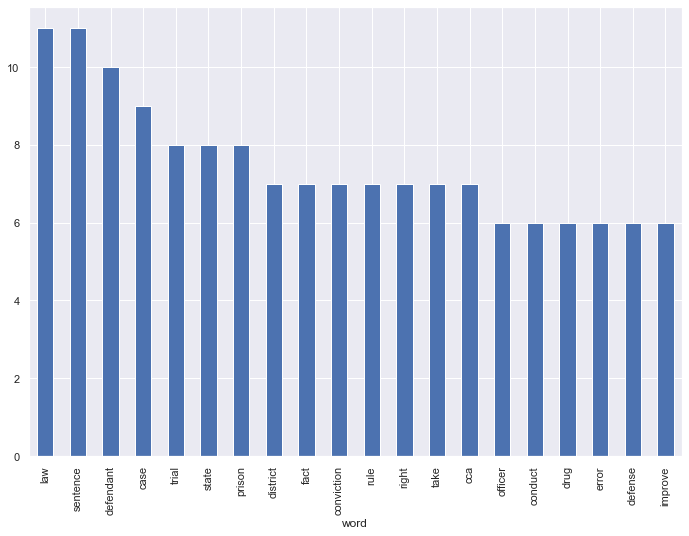

In [82]:
axes =  positive_after.plot.bar(x='word', y='count', legend=False)

In [83]:
data.head()

,Phrase,New_Label
0,get surplusage,Negative
1,court suggest narrow bivens exist scope,Negative
2,petitioner objection shave beard clash arkansa...,Negative
3,result clash,Negative
4,tolerable duration police inquiry traffic stop...,Neutral


In [84]:
df=data
df.head()

,Phrase,New_Label
0,get surplusage,Negative
1,court suggest narrow bivens exist scope,Negative
2,petitioner objection shave beard clash arkansa...,Negative
3,result clash,Negative
4,tolerable duration police inquiry traffic stop...,Neutral


In [85]:
df = df.rename(columns={'Phrase': 'text'})
df.head()

,text,New_Label
0,get surplusage,Negative
1,court suggest narrow bivens exist scope,Negative
2,petitioner objection shave beard clash arkansa...,Negative
3,result clash,Negative
4,tolerable duration police inquiry traffic stop...,Neutral


Word embeddings 

Specifically, the Word2Vec model from Gensim is used to create word embeddings for the tokenized text, representing each word as a high-dimensional vector. These embeddings capture semantic relationships between words based on their co-occurrence patterns in the text.

In [86]:
from gensim.models import Word2Vec

# Tokenize the text (assuming you haven't done it already)
df['tokenized_text'] = df['text'].apply(word_tokenize)

# Train a Word2Vec model
model = Word2Vec(df['tokenized_text'], vector_size=100, window=5, min_count=1, sg=0)

# Save the model if needed
model.save("word2vec_model")



In [87]:
df.head()

,text,New_Label,tokenized_text
0,get surplusage,Negative,"[get, surplusage]"
1,court suggest narrow bivens exist scope,Negative,"[court, suggest, narrow, bivens, exist, scope]"
2,petitioner objection shave beard clash arkansa...,Negative,"[petitioner, objection, shave, beard, clash, a..."
3,result clash,Negative,"[result, clash]"
4,tolerable duration police inquiry traffic stop...,Neutral,"[tolerable, duration, police, inquiry, traffic..."


# Model Building using an LSTM

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [89]:
# Load the Word2Vec model
word2vec_model = Word2Vec.load("word2vec_model")

In [90]:
# Use the 'tokenized_text' column for X
X_text_tokens = df['text'].to_list()

In [91]:
# Convert text tokens to numerical sequences using the tokenizer
tokenizer = Tokenizer()

X = tokenizer.texts_to_sequences(X_text_tokens)

In [92]:
# Pad sequences to a fixed length
max_sequence_length = 100  # You can adjust this based on your data
X = pad_sequences(X, maxlen=max_sequence_length, padding='post', truncating='post', dtype='float32')

In [93]:
# Prepare Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['New_Label'])
y_one_hot = to_categorical(y_encoded)

In [94]:
# Create an embedding matrix that matches the Word2Vec model's vectors
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

In [95]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=3)

In [96]:
# Define the LSTM model
embedding_dim = word2vec_model.vector_size  # Size of the Word2Vec vectors
num_classes = 3  # Number of sentiment classes (e.g., positive, neutral, negative)

model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_dim,
                    input_length=max_sequence_length, weights=[embedding_matrix], trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

In [97]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split =0.1)

Epoch 1/5
7/7 [==============================] - 11s 544ms/step - loss: 1.0945 - accuracy: 0.4952 - val_loss: 1.0959 - val_accuracy: 0.3913
Epoch 2/5
7/7 [==============================] - 3s 413ms/step - loss: 1.0794 - accuracy: 0.4952 - val_loss: 1.0935 - val_accuracy: 0.3913
Epoch 3/5
7/7 [==============================] - 3s 469ms/step - loss: 1.0591 - accuracy: 0.4952 - val_loss: 1.1154 - val_accuracy: 0.3913
Epoch 4/5
7/7 [==============================] - 4s 643ms/step - loss: 1.0452 - accuracy: 0.4952 - val_loss: 1.1193 - val_accuracy: 0.3913
Epoch 5/5
7/7 [==============================] - 3s 332ms/step - loss: 1.0465 - accuracy: 0.4952 - val_loss: 1.0900 - val_accuracy: 0.3913


In [98]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

4/4 [==============================] - 0s 26ms/step - loss: 1.0337 - accuracy: 0.5086
Test Loss: 1.0337, Test Accuracy: 0.5086


In [99]:
y_pred = model.predict(X_test)

In [100]:
# To calculate the F1-score for a multiclass problem, you need to convert these probabilities into class labels. You can do this by taking the index of the maximum probability in each row.

In [101]:
from sklearn.metrics import f1_score

# Convert probabilities in y_pred to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Assuming y_test is already in label format
y_test_labels = np.argmax(y_test, axis=1)

f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

print(f"F1-Score: {f1:.4f}")


F1-Score: 0.3430


# Conclusion

Test Loss (1.0337): The test loss value of 1.0545 indicates the average discrepancy between the model's predicted probabilities and the actual target values in the test dataset. A lower test loss suggests that the model's predictions are closer to the true values.
The  model's predicted probabilities are somewhat off from the true labels. 


Test Accuracy (0.5): The test accuracy value of 0.5 means that the model correctly classified approximately 50% of the data points in the test dataset. While this accuracy is moderate, it provides a general measure of the model's classification performance.
There is room for improvement.
    


An F1-score of 0.3430 suggests that the balance between precision and recall for the model's predictions is not optimal. It indicates that the model may be making a significant number of false positives and/or false negatives. The score is lower than the accuracy you reported, which means that while the model might be getting 50% of the predictions right, the predictions it gets wrong have a significant impact on precision and recall.
